Import packages for analyzing and visualising data

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Paths for data source

In [2]:
finance_path = './finance_employees.csv'
users_path = './active_users.csv'

importing finance and employees data

In [3]:
# Read the finance data
finance_data = pd.read_csv(finance_path, delimiter=',', header=0)

# Display the dataframe
print(finance_data)

    Year  Income  Profit  Employees
0   2007     153    -138        450
1   2008     272     -56        850
2   2009     777     229       1218
3   2010    1974     606       2127
4   2011    3711    1000       3200
5   2012    5089      53       4619
6   2013    7872    1500       6337
7   2014   12466    2940       9199
8   2015   17928    3688      12691
9   2016   27638   10217      17048
10  2017   40653   15934      25105


User data import

In [4]:
users_data = pd.read_csv(users_path, delimiter=',', header=0)

# Display the dataframe
print(users_data)

    Year  Quarter  Users
0   2008        3    100
1   2009        1    197
2   2009        2    242
3   2009        3    305
4   2009        4    360
5   2010        1    431
6   2010        2    482
7   2010        3    550
8   2010        4    608
9   2011        1    680
10  2011        2    739
11  2011        3    800
12  2011        4    845
13  2012        1    901
14  2012        2    955
15  2012        3   1007
16  2012        4   1056
17  2013        1   1110
18  2013        2   1155
19  2013        3   1189
20  2013        4   1228
21  2014        1   1276
22  2014        2   1317
23  2014        3   1350
24  2014        4   1393
25  2015        1   1441
26  2015        2   1490
27  2015        3   1545
28  2015        4   1591
29  2016        1   1654
30  2016        2   1712
31  2016        3   1788
32  2016        4   1860
33  2017        1   1936
34  2017        2   2006
35  2017        3   2072
36  2017        4   2129


Visualisation of imported data

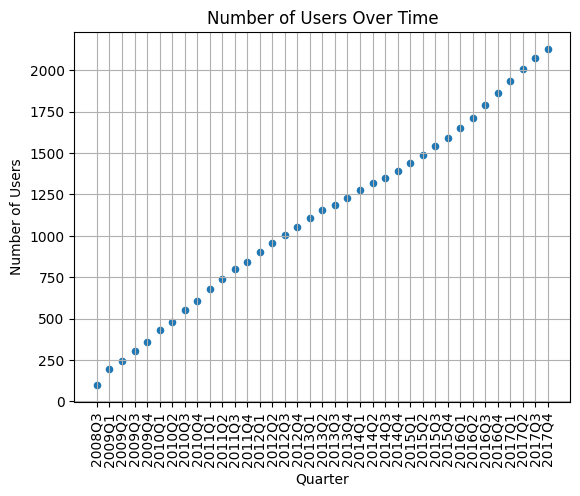

In [5]:
users_data['Year_Quarter'] = users_data['Year'].astype(str) + 'Q' + users_data['Quarter'].astype(str)

users_data.plot(x='Year_Quarter', y='Users', kind='scatter', marker='o', title='Number of Users Over Time')
plt.xlabel('Quarter')
plt.xticks(rotation=90)
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

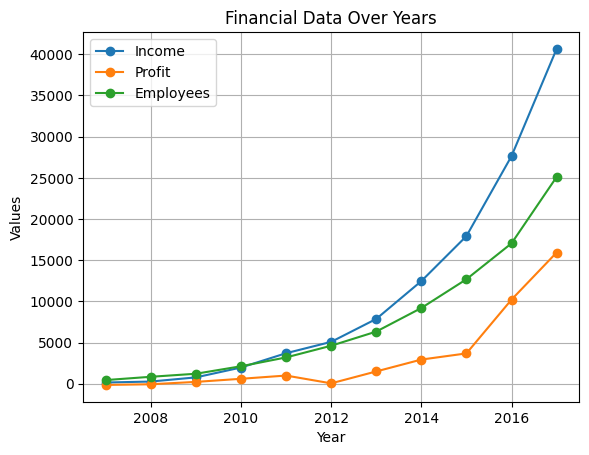

In [114]:
finance_data.plot(x='Year', y=['Income', 'Profit', 'Employees'], kind='line', marker='o', title='Financial Data Over Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid(True)
plt.legend(['Income', 'Profit', 'Employees'])
plt.show()

Dodanie modelu regresji liniowej do wykresu liczby użytkowników w czasie

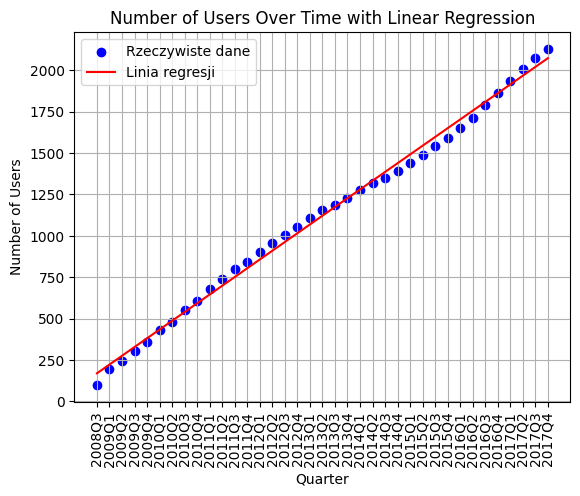

In [115]:
from sklearn.linear_model import LinearRegression

# Przygotowanie danych do modelu regresji
X = users_data.index.values.reshape(-1, 1)  # Używamy indeksu jako zmiennej niezależnej
y = users_data['Users'].values  # Zmienna zależna

# Tworzenie i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X, y)

# Przewidywanie wartości
y_pred = model.predict(X)

# Rysowanie wykresu z linią regresji
plt.scatter(users_data['Year_Quarter'], users_data['Users'], color='blue', label='Rzeczywiste dane')
plt.plot(users_data['Year_Quarter'], y_pred, color='red', label='Linia regresji')
plt.xlabel('Quarter')
plt.ylabel('Number of Users')
plt.title('Number of Users Over Time with Linear Regression')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

Wyświetlanie parametrów regresji liniowej

In [116]:
import statsmodels.api as sm

# Konwersja kolumny Year_Quarter na wartości numeryczne
users_data['Year_Quarter_Num'] = pd.factorize(users_data['Year_Quarter'])[0]

# Przygotowanie danych do modelu regresji
X = sm.add_constant(users_data['Year_Quarter_Num'])  # Dodanie stałej do modelu
y = users_data['Users']

# Tworzenie i trenowanie modelu regresji liniowej
model = sm.OLS(y, X).fit()

# Wyświetlanie wyników modelu
print(model.summary())

# Wyciąganie parametrów strukturalnych
params = model.params
print("Parametry strukturalne:", params)

# Wyciąganie odchyleń standardowych
std_err = model.bse
print("Odchylenia standardowe:", std_err)

# Wyciąganie miar dopasowania
r_squared = model.rsquared
print("R-kwadrat:", r_squared)

# Testowanie hipotez
hypothesis_test = model.t_test([1, 0])
print("Test hipotezy dla wyrazu wolnego:", hypothesis_test)

                            OLS Regression Results                            
Dep. Variable:                  Users   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     7729.
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           1.18e-42
Time:                        22:17:14   Log-Likelihood:                -187.07
No. Observations:                  37   AIC:                             378.1
Df Residuals:                      35   BIC:                             381.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              170.1906     12.583  

Dodanie modelu regresji do wykresu finansów i pracowników

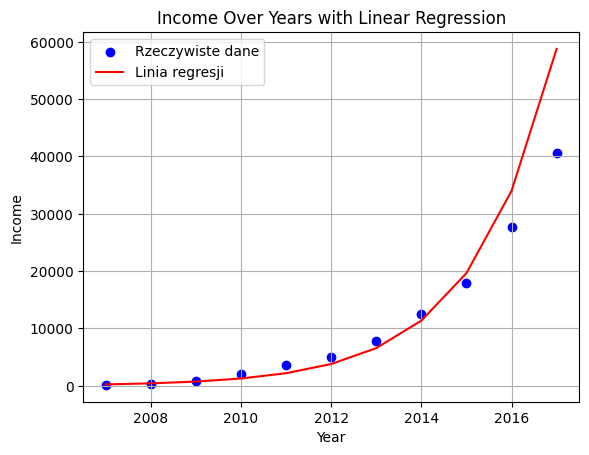

In [117]:
# Przygotowanie danych do modelu regresji
X = finance_data.index.values.reshape(-1, 1)  # Używamy indeksu jako zmiennej niezależnej
y = finance_data['Income'].values  # Zmienna zależna
log_y = np.log(y)

# Tworzenie i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X, log_y)

# Przewidywanie wartości
log_y_pred = model.predict(X)
y_pred = np.exp(log_y_pred)

# Rysowanie wykresu z linią regresji
plt.scatter(finance_data['Year'], finance_data['Income'], color='blue', label='Rzeczywiste dane')
plt.plot(finance_data['Year'], y_pred, color='red', label='Linia regresji')
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Income Over Years with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


Wyświetlanie parametrów regresji

In [118]:
import statsmodels.api as sm

# Przygotowanie danych do modelu regresji
X = sm.add_constant(finance_data['Year'])  # Dodanie stałej do modelu
y = finance_data['Income']

# Tworzenie i trenowanie modelu regresji liniowej
model = sm.OLS(y, X).fit()

# Wyświetlanie wyników modelu
print(model.summary())

# Wyciąganie parametrów strukturalnych
params = model.params
print("Parametry strukturalne:", params)

# Wyciąganie odchyleń standardowych
std_err = model.bse
print("Odchylenia standardowe:", std_err)

# Wyciąganie miar dopasowania
r_squared = model.rsquared
print("R-kwadrat:", r_squared)

# Testowanie hipotez
hypothesis_test = model.t_test([1, 0])
print("Test hipotezy dla wyrazu wolnego:", hypothesis_test)

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     35.32
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           0.000217
Time:                        22:17:14   Log-Likelihood:                -110.62
No. Observations:                  11   AIC:                             225.2
Df Residuals:                       9   BIC:                             226.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.096e+06    1.2e+06     -5.934      0.0

c:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


### Proponowane modele regresji liniowej

W niniejszym notatniku zastosowano dwa modele regresji liniowej: jeden do analizy liczby użytkowników w czasie, a drugi do analizy dochodów finansowych w czasie. Poniżej przedstawiono uzasadnienie wyboru tych modeli oraz sposób ich praktycznego użycia.

#### 1. Model regresji liniowej dla liczby użytkowników

Model regresji liniowej został zastosowany do analizy liczby użytkowników w czasie. Wykorzystano indeksy jako zmienną niezależną (X) oraz liczbę użytkowników jako zmienną zależną (y). Model ten pozwala na:

- **Analizę trendów**: Możemy zidentyfikować, czy liczba użytkowników rośnie, maleje, czy pozostaje stabilna w czasie.
- **Predykcję przyszłych wartości**: Na podstawie istniejących danych możemy przewidzieć liczbę użytkowników w przyszłych okresach.
- **Ocena wpływu sezonowości**: Możemy sprawdzić, czy istnieją okresy, w których liczba użytkowników znacząco się zmienia.

#### 2. Model regresji liniowej dla dochodów finansowych

Model regresji liniowej został zastosowany do analizy dochodów finansowych w czasie. Wykorzystano indeksy jako zmienną niezależną (X) oraz logarytm dochodów jako zmienną zależną (log_y). Model ten pozwala na:

- **Analizę wzrostu dochodów**: Możemy zidentyfikować, czy dochody rosną wykładniczo w czasie.
- **Predykcję przyszłych dochodów**: Na podstawie istniejących danych możemy przewidzieć przyszłe dochody finansowe.
- **Ocena stabilności finansowej**: Możemy sprawdzić, czy dochody są stabilne, czy też występują duże wahania.

### Praktyczne użycie modeli

#### Predykcja liczby użytkowników

Model regresji liniowej dla liczby użytkowników może być użyty do przewidywania liczby użytkowników w przyszłych kwartałach. Na przykład, możemy przewidzieć liczbę użytkowników na podstawie danych historycznych i ocenić, czy nasze działania marketingowe przynoszą oczekiwane rezultaty.

#### Predykcja dochodów finansowych

Model regresji liniowej dla dochodów finansowych może być użyty do przewidywania przyszłych dochodów firmy. Na przykład, możemy przewidzieć dochody na podstawie danych historycznych i ocenić, czy nasze strategie biznesowe są skuteczne. Możemy również ocenić, czy firma jest na dobrej drodze do osiągnięcia swoich celów finansowych.

### Podsumowanie
W niniejszym notatniku modele regresji wykorzystano do analizy liczby użytkowników oraz dochodów finansowych, co pozwala na lepsze zrozumienie trendów i podejmowanie bardziej świadomych decyzji biznesowych.